# 01-Basic & Logistic Regression

[1.벡터화(Vectorization)](#1)

[2.Derivative](#2)

[3.Logistic Regression(Single Layer)](#3)
  - [3-1.Download & Load Dataset](#3-1)
  - [3-2.Data Processing](#3-2)
  - [3-3.Build NN & Training](#3-3)
  - [3-4.Predictions](#3-4)

[4.Merging to Model](#4)

In [2]:
import time
import copy
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

<a id="1"></a>
## 1.벡터화(Vectorization)

딥러닝에서 사용하는 데이터들은 스칼라(단일 상수)보다는 벡터나 행렬과 같이 다차원 값을 많이 사용한다.

벡터의 내적을 계산할 때, 벡터가 가진 원소별로 곱하고 그 값들을 모두 더해야하는데,  
일반적인 반복문을 통해 내적 연산을 구현하면 너무 비효율적이다.

In [2]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

start_time = time.process_time()
result = 0
for i in range(len(x1)): ## 벡터의 내적은 두 벡터의 차원이 같을 때 가능한 연산.
    result += x1[i] * x2[i]
end_time = time.process_time()

print(f"{result}, Computation Time : {1000 * (end_time - start_time)}ms")

278, Computation Time : 0.032050000000005685ms


파이썬에서 다차원 값을 이용한 계산은 Numpy 라이브러리를 많이 이용한다.  
계산과정을 위한 코드가 훨씬 간단해지고, 속도도 훨씬 더 빠르다.

In [3]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

start_time = time.process_time()
result = np.dot(x1, x2)
end_time = time.process_time()
print(f"{result}, Computation Time : {1000 * (end_time - start_time)}ms")

278, Computation Time : 0.026980999999981492ms


$$
Sigmoid(x) = \sigma(x) = \frac{1}{1 + e^{-x}}
$$


다음과 같이 스칼라를 입력 받는 형태의 함수 정의는 타입에러로 인해 다차원 값을 계산할 수 없다.

In [4]:
## 입력으로 상수값만 가능한 형태의 구현.
## 또는 단일 독립변수를 이용하는 함수라고 봐도 무방하다.
def basic_sigmoid(x):
    s = 1 / (1 + math.exp(-x))

    return s

In [5]:
print(basic_sigmoid(10))

0.9999546021312976


In [6]:
## x=[1,2,3]과 같이 리스트 타입의 입력은 불가능하다. 즉, 벡터나 행렬과 같이 다차원의 입력은 계산이 불가능하다.
## 다변수함수(vector function) 형태의 구현이 필요함.

x = [1, 2, 3]
# basic_sigmoid(x) ## -> TypeError: bad operand type for unary -: 'list'

이럴 때도 Numpy를 이용하는 것이 훨씬 효과적이다.  
벡터(또는 행렬)을 입력하고 `np.exp(-x)`와 같은 연산을 적용하면 모든 원소에 지수함수 $e^x$가 적용된다.

$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [7]:
## 벡터나 행렬과 같은 다차원 데이터를 입력으로 계산을 하기 위해서는 numpy 라이브러리를 활용한다.
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))

    return s

In [8]:
x = np.array([1, 2, 3])
print(sigmoid(x))

[0.73105858 0.88079708 0.95257413]


- $\text{for } x \in \mathbb{R}^{1\times n} \text{,     }$

\begin{align*}
 softmax(x) &= softmax\left(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}\right) \\&= \begin{bmatrix}
    \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} 
\end{align*}

In [9]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp / x_sum

    return s

In [10]:
x = np.array([[9, 2, 5, 0, 0],
               [7, 5, 0, 0 ,0]])
print(softmax(x))

[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


<a id="2"></a>
## 2.Derivative

딥러닝에서의 학습이란 prediction과 ground-truth간 오차, loss를 계산하고 이를 Backpropagation함으로써  
NN이 가진 Trainable parameter를 업데이트하는 방식으로 진행된다.

여기서 "업데이트"라는 것은 해당 변수에 대한 손실값의 미분을 계산해 "어떤 방향으로 변수의 값을 조정해야 손실값이 감소할까?"를 알아내고,  
손실값이 감소하는 방향으로 변수의 값을 조정하는 것이다.

$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))$$

In [11]:
def sigmoid_derivative(x):
    s = 1 / (1 + np.exp(-x))
    ds = s * (1 - s)

    return ds

In [12]:
x = np.array([1, 2, 3])
print(sigmoid_derivative(x))

[0.19661193 0.10499359 0.04517666]


<a id="3"></a>
## 3.Logistic Regression(Single Layer)

<a id="3-1"></a>
### 3-1.Download & Load Dataset

In [3]:
X, Y = make_moons(n_samples=5000, noise=0.2, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Y 레이블을 (n, 1) 형태로 변환
train_y = train_y.reshape(-1, 1)
test_y = test_y.reshape(-1, 1)

# 넘파이 배열로 변환
train_x = train_x.T
train_y = train_y.T
test_x = test_x.T
test_y = test_y.T

# 데이터 형태 확인
print("train_x shape:", train_x.shape)
print("train_y shape:", train_y.shape)
print("test_x shape:", test_x.shape)
print("test_y shape:", test_y.shape)

train_x shape: (2, 4000)
train_y shape: (1, 4000)
test_x shape: (2, 1000)
test_y shape: (1, 1000)


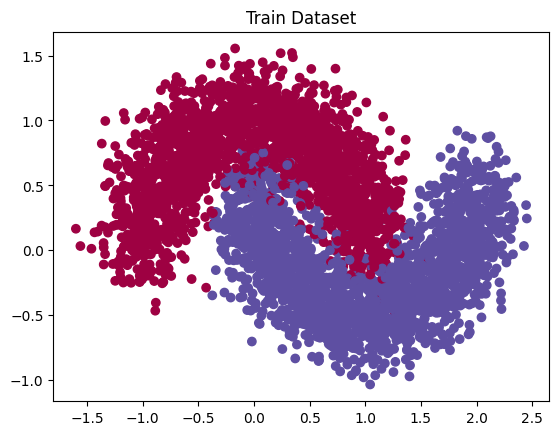

In [5]:
plt.scatter(train_x[0, :], train_x[1, :], c=train_y[0, :], cmap=plt.cm.Spectral)
plt.title("Train Dataset")
plt.show()

<a id="3-2"></a>
### 3-2. Data Processing

In [7]:
m_train = train_x.shape[1]
m_test = test_x.shape[1]
num_feature = train_x.shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("number of features in data sample: num_feature = " + str(num_feature))
print ("train_set_x shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

Number of training examples: m_train = 4000
Number of testing examples: m_test = 1000
number of features in data sample: num_feature = 2
train_set_x shape: (2, 4000)
train_set_y shape: (1, 4000)
test_set_x shape: (2, 1000)
test_set_y shape: (1, 1000)


<a id="3-3"></a>
### 3-3. Build NN & Training

하나의 데이터 샘플 $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

전체 데이터샘플에 대한 loss를 구하고 이들의 평균값을 출력한다.:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

In [8]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))

    return s

def initialize_with_zeros(input_dim):
    w = np.zeros((input_dim, 1)) ## 입력 데이터 샘플의 feature 수에 맞춰지기 때문.
    b = 0.0

    return w, b

Forward Propagation:
$$A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$
$$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$$

BackPropagation: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [9]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    Z = np.dot(w.T, X) + b
    A = 1 / (1 + np.exp(-Z)) ## sigmoid(w^Tx +b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) ## BCE

    dw = 1/m * np.dot(X, np.transpose((A-Y))) ## Gradient of \partial J / \partial w
    db = 1/m * np.sum(A-Y) ## Gradient of \partial J / \partial b

    # cost = np.squeeze(np.array(cost))
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [10]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


In [11]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []
    for i in range(num_iterations):
        ## forward propagte
        grads, cost = propagate(w, b, X, Y)
        
        ## gradients
        dw = grads["dw"]
        db = grads["db"]

        ## update trainable params
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [12]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [0.15900537707692405]


<a id="3-4"></a>
### 3-4.Predictions

In [13]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = 1 / (1 + np.exp(-(w.T @ X + b)))

    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

    return Y_prediction

In [14]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


<a id="4"></a>
## 4. Merging to Model

In [15]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = params['w']
    b = params['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [16]:
logistic_regression_model = model(train_x, train_y, test_x, test_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.648813
Cost after iteration 200: 0.612363
Cost after iteration 300: 0.582050
Cost after iteration 400: 0.556552
Cost after iteration 500: 0.534872
Cost after iteration 600: 0.516255
Cost after iteration 700: 0.500124
Cost after iteration 800: 0.486032
Cost after iteration 900: 0.473630
Cost after iteration 1000: 0.462642
Cost after iteration 1100: 0.452845
Cost after iteration 1200: 0.444062
Cost after iteration 1300: 0.436146
Cost after iteration 1400: 0.428977
Cost after iteration 1500: 0.422457
Cost after iteration 1600: 0.416501
Cost after iteration 1700: 0.411040
Cost after iteration 1800: 0.406015
Cost after iteration 1900: 0.401375
train accuracy: 82.225 %
test accuracy: 83.4 %
